<img src="Figures/top_ML.png" alt="Drawing" style="width: 1000px;"/>

# Sesión 4. Ejercicio de aprendizaje supervisado: clasificación.

## *Clasificación binaria de precios de electricidad en el Mercado Diario.*

**Objetivo:** predecir en qué horas el precio de la electricidad en el Mercado Diario será elevado, siendo la **clase 0** para valores menores al cuartil superior Q3, y **clase 1** para valores mayores al cuartil superior Q3 (precio electricidad > Q3 = 59 €/MWh).  Se utilizarán datos históricos de la variable target que queremos clasificar y de otros atributos (features) que pueden ayudar a predecir modelo.


**Contexto:** Una empresa que compre energía directamente en el mercado diario, quiere conocer el día anterior en que franjas horarias del dia siguiente el coste de la electricidad va a ser excesivamente elevado. Así pueden re-organizar (si es pobible) el consumo de las cargas o descargar baterías durante esas horas, reduciendo el coste de la factura eléctrica.

### Antes de empezar:

* En el archivo **S4_datos_E1_categoricaldata.csv** se encuentra el conjunto de datos de entrada de este ejemplo (atributos + etiqueta). 
* El histórico de datos va desde 01/01/2018 hasta 16/06/2020.


## **1. Importar librerías y datos**


In [84]:
# Importamos las librerías
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargamos el conjunto de datos de entrada
dataset = pd.read_csv('Data/S4_datos_E1_categoricaldata.csv', delimiter=';')

## **2. Comprender los datos**

Es necesario visualizar y comprender los datos con los que vamos a trabajar, así como conocer sus características. 

1. ¿Cuántos datos hay? ¿Cuántos atributos hay en los datos?  
2. ¿Qué significan?
3. ¿Falta algún dato?
4. ¿Están balanceadas las etiquetas? 
4. Resumen estadístico del conjunto de datos de entrada.

**1. ¿Cuántos datos hay?**  Hay 21839 filas y 11 columnas en total.  **¿Cuántos atributos hay en los datos?** Existen 10 atributos y 1 etiqueta.

In [85]:
# Filasxcolumnas de los datos
dataset.shape


(21839, 11)

In [86]:
# Observa las primeras 5 filas de los datos
dataset.head()

,Hora,Mes,Hidraul,Eolica,Demanda,Ciclocomb,Cogener,Nuclear,Carbon,Biomas,Clases
0,0,1,1061.0,12613.0,19596.0,1322.6,2099.9,7101.5,773.0,352,normal_price
1,1,1,1073.0,11423.1,18027.1,1322.6,2087.4,7102.5,772.0,226,normal_price
2,2,1,932.8,11052.1,17202.5,1322.6,2124.9,7102.5,701.0,469,normal_price
3,3,1,889.7,8176.0,16788.2,1149.6,2123.0,7102.5,521.0,439,normal_price
4,4,1,869.6,7748.0,16438.7,1149.6,2119.8,7102.5,521.0,459,normal_price


**2. ¿Qué significan?** 
* ***[Hora, Mes]*** Hora y mes de cada una de las observaciones. Son valores enteros *int64*.

* ***[Hidraul, Eolica, Ciclocomb, Cogener, Nuclear, Carbon, Biomas]*** se refiere a la energía programada horaria del programa PVP en el mercado diario por tipo de producción.  Son valores reales *float*.

* ***[Demanda]*** es la totalidad de energía programada en el mercado diario eléctrico en España.  Son valores reales *float*.

* ***[Clases]*** son las etiquetas de precio que queremos predecir. Son valores enteros *int64*.




In [87]:
# Formato de los datos
dataset.dtypes

Hora           int64
Mes            int64
Hidraul      float64
Eolica       float64
Demanda      float64
Ciclocomb    float64
Cogener      float64
Nuclear      float64
Carbon       float64
Biomas         int64
Clases        object
dtype: object

**3. ¿Falta algún dato? De ser así, indica cuántos y en que atributo** 

* Sí, hay 14 missing data en los atributos Demanda y Carbon.  


In [88]:
# Comprobar si falta algún dato y en qué atributo
dataset.isna().sum()

Hora         0
Mes          0
Hidraul      0
Eolica       0
Demanda      7
Ciclocomb    0
Cogener      0
Nuclear      0
Carbon       7
Biomas       0
Clases       0
dtype: int64

**4. ¿Están balanceadas las etiquetas?** Existe un desbalance de las etiquetas. La etiqueta 0 abarca un 75% de las muestras, mientras que la 1, un 25%. 

normal_price       16453
very_high_price     5386
Name: Clases, dtype: int64


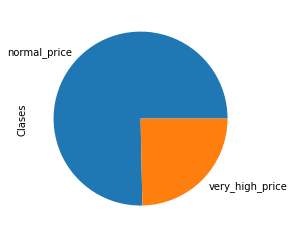

In [89]:
# Comprobar si las etiquetas están desvalanceadas
balance_clases = dataset['Clases'].value_counts()
print(balance_clases)

# Gráfico del balance de clases
balance_clases.plot.pie()

**5. Resumen estadístico del conjunto de datos de entrada:** La estadística descriptiva recolecta y analiza el conjunto de datos de entrada con el objetivo de describir las características y comportamientos de este conjunto mediante las siguientes medidas resumen: número total de observaciones (count), media (mean), desviación estándar (std), valor mínimo (min), valor máximo (max) y los valores de los diferentes cuartiles (25%, 50%, 75%).

In [90]:
# Datos estadísticos de cada uno de los atributos
dataset.describe()

,Hora,Mes,Hidraul,Eolica,Demanda,Ciclocomb,Cogener,Nuclear,Carbon,Biomas
count,21839.000000,21839.000000,21839.000000,21839.000000,21832.000000,21839.000000,21839.000000,21839.000000,21832.000000,21839.000000
mean,11.500435,5.971610,2679.638853,6181.908673,21120.698085,2942.060937,3290.924182,6197.929580,1935.312917,374.314895
std,6.922205,5.390028,1560.976734,3393.844900,3731.703625,2643.533966,285.520077,930.955569,1911.238184,102.293626
min,0.000000,1.000000,276.200000,515.900000,11950.400000,157.000000,1825.500000,3410.200000,0.000000,197.000000
25%,6.000000,3.000000,1414.100000,3553.450000,18158.550000,1100.100000,3124.300000,5316.550000,535.000000,286.000000
50%,12.000000,6.000000,2311.100000,5493.000000,21026.200000,1806.500000,3321.300000,6374.800000,981.000000,375.000000
75%,17.500000,9.000000,3716.450000,8253.000000,23863.625000,4039.850000,3490.300000,7024.600000,3135.000000,462.000000
max,23.000000,584.000000,8504.300000,18996.300000,35458.900000,13789.200000,3936.100000,7115.400000,7465.100000,551.000000


## **3. Visualizar los datos**

Una manera visual de entender los datos de entrada. 
1. Histograma
2. Curva de densidad
3. Boxplots
4. Matriz de correlación


**1. Histograma**

Respresentación gráfica de cada uno de los atributos en forma de barras, donde la superficie de la barra es proporcional a la frecuencia de los valores representados.

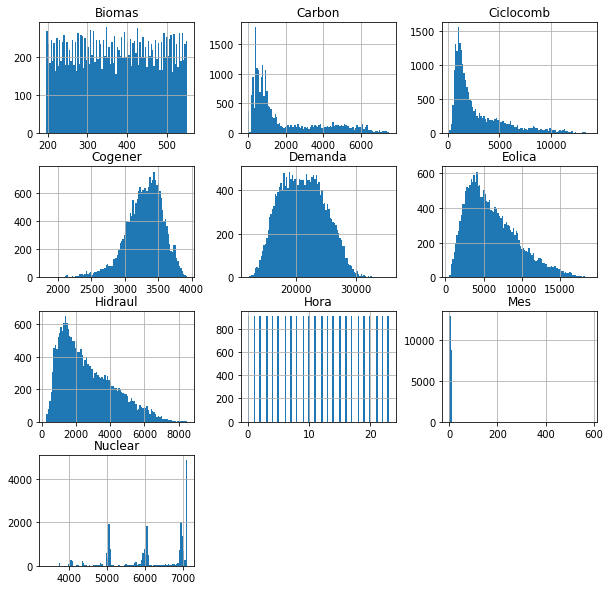

In [91]:
histograma = dataset.hist(xlabelsize=10, ylabelsize=10, bins=100, figsize=(10, 10))

**2. Gráfico de densidades**

Visualiza la distribución de los datos. Es una variable del histograma, pero elimina el ruido, por lo que son mejores para determinar la forma de distribución de un atributo. Lo spicos del gráfico de densidad ayudan a mostrar dónde los valores se concentran más. 

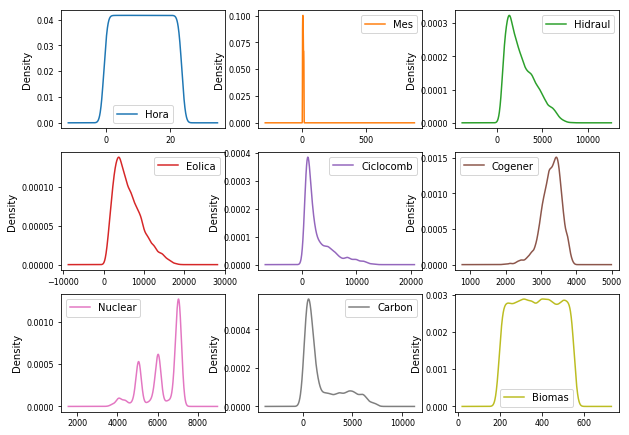

In [10]:
density = dataset.plot(kind='kde', x=4, subplots=True, legend=True, layout=(4, 3), figsize=(10, 10), sharex=False,
                        fontsize=8, stacked=True) 

**3. Boxplots** 

El boxplot (diagrama de caja) nos permite identificar los valores atípicos y comparar distribuciones. Además, se conoce como se distribuyen el 50% de los valores (dentro de la caja).

* **¿Que atributo llama la atención por sus valores atípicos?** El atributo mes. 

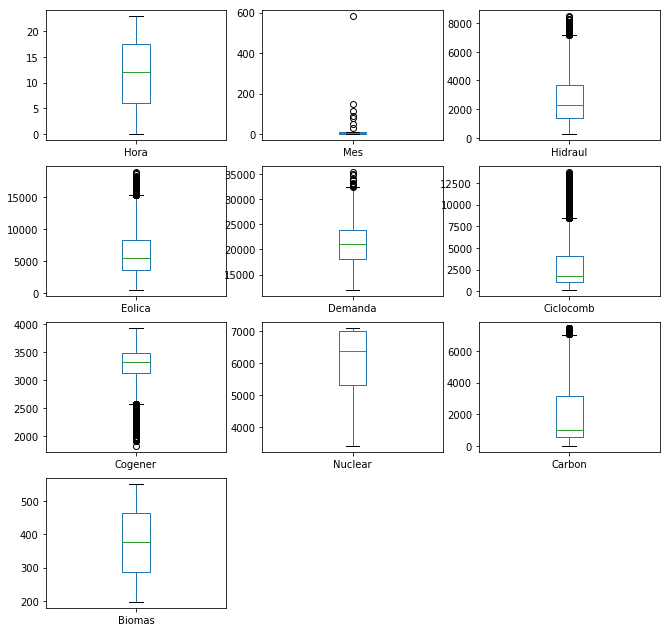

In [11]:
atributos_boxplot = dataset.plot(kind='box', subplots=True, layout=(4, 3), figsize=(11, 11), sharex=False,
                                 sharey=False, fontsize=10)

**4. Matriz de correlación** 

* **¿Qué variable no tiene ninguna correlación con ningún atributo?** 

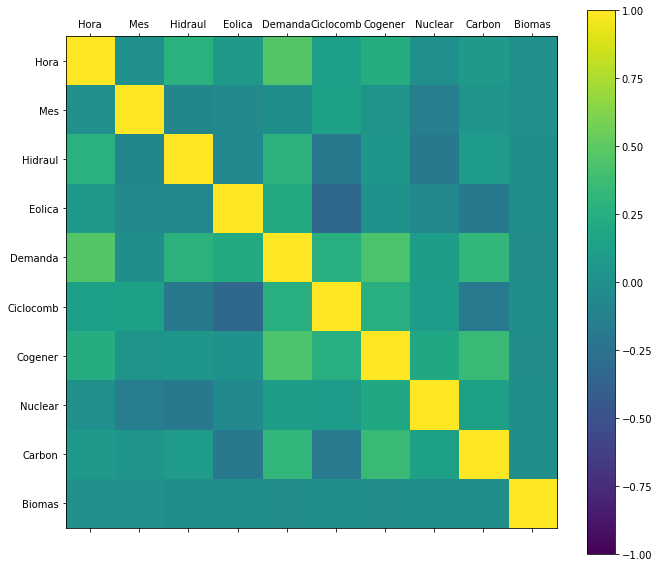

In [92]:
# Cálculo de coeficientes de correlación
corr_matrix = dataset.corr(method='pearson') 

# Matriz de correlación
fig = plt.figure(figsize=(11, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr_matrix, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, 10, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.columns)
plt.show()

## *4. Preparar los datos*

1. Missing data
2. Data cleaning (eliminar outliers).
3. LabelEncoding
4. Feature engineering
5. Transformación (escalado).

Primero, divido los datos en **atributos**: X (features) y **etiquetas**: y (target)

In [93]:
# Atributos X (features); etiquetas y (target)
X = dataset.drop(['Clases'], axis=1) 
y = dataset['Clases']

**1. Missing data**

* Comprobar si hay missing data. 
* **Si faltan datos, completa las casillas vacias con el valor medido anterior del atributo**: utiliza *X["Columna"].fillna(method='ffill', inplace=True)*





In [94]:
# Comprobar si faltan datos en los atributos
X.isna().sum()

Hora         0
Mes          0
Hidraul      0
Eolica       0
Demanda      7
Ciclocomb    0
Cogener      0
Nuclear      0
Carbon       7
Biomas       0
dtype: int64

In [95]:
# Relleno los missing values de cada atributo con el valor anterior del atributo. 
X["Demanda"].fillna(method='ffill', inplace=True)
X["Carbon"].fillna(method='ffill', inplace=True)

In [96]:
# Comprobar si faltan datos en el target
y.isna().sum()

0

In [97]:
# Comprueba que no falta ningún valor
X.isna().sum()

Hora         0
Mes          0
Hidraul      0
Eolica       0
Demanda      0
Ciclocomb    0
Cogener      0
Nuclear      0
Carbon       0
Biomas       0
dtype: int64

**2. Data cleaning (eliminar outliers)**

Eliminar los outliers del atributo. 

In [98]:
import numpy as np

Q1, Q3 = np.percentile(X['Mes'], [25, 75])
print('Cuartil 1 (Q1 = %d) ; Cuartil 3 (Q3 = %d)' %(Q1, Q3))
iqr = Q3 - Q1
limite_inferior = Q1 - (iqr * 1.5)
limite_superior = Q3 + (iqr * 1.5)
filas_outliers = np.where((X['Mes'] > limite_superior) | (X['Mes'] < limite_inferior))
print(filas_outliers)

# Eliminar las filas donde existen estos outliers:
X_sinoutliers = X.drop(X.index[filas_outliers],axis=0)
y_sinoutliers = y.drop(X.index[filas_outliers],axis=0)
# Imprimir las filas que resultan ahora.

Cuartil 1 (Q1 = 3) ; Cuartil 3 (Q3 = 9)
(array([  613,  9527, 10892, 11948, 15379, 18301, 21582], dtype=int64),)


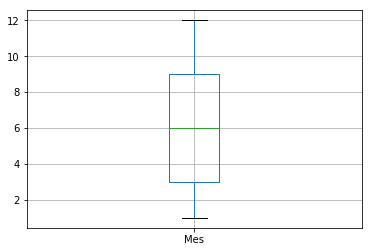

In [99]:
# Graficar el boxplot
X_sinoutliers.boxplot(column=['Mes'])

**3. Label encoding** 

In [111]:
from sklearn.preprocessing import LabelEncoder

lab_encoder = LabelEncoder() 
lab_encoder.fit(y_sinoutliers)  
print(lab_encoder.classes_)  # Muestra las clases diferentes que hay

y_numeric = lab_encoder.transform(y_sinoutliers)
print(y_numeric)

['normal_price' 'very_high_price']
[0 0 0 ... 0 0 0]


**3. Feature engineering**

Utilizando la matriz de correlación, eliminar los atributos con una correlacion cercana a 0 con la etiqueta **"Clases"**. 

* **¿Qué atributo(s) se elimana(n)?** 
    * Biomas (0.006)

In [106]:
# Elimino el atributo
X_sinoutliers.drop(['Biomas'], axis='columns', inplace=True)

**4. Transformación (escalado)**. 

* **Escalar los datos utilizando el método de *MinMaxScaler()* dentro del rango [0,1].**

In [107]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = X_sinoutliers.copy()
X_scaled = pd.DataFrame(scaler.fit_transform(df_scaled))
X_scaled.columns = df_scaled.columns
X_scaled.head()

,Hora,Mes,Hidraul,Eolica,Demanda,Ciclocomb,Cogener,Nuclear,Carbon
0,0.000000,0.0,0.095380,0.654591,0.325227,0.085503,0.130010,0.996249,0.103549
1,0.043478,0.0,0.096839,0.590204,0.258489,0.085503,0.124088,0.996518,0.103415
2,0.086957,0.0,0.079800,0.570128,0.223413,0.085503,0.141855,0.996518,0.093904
3,0.130435,0.0,0.074562,0.414499,0.205789,0.072813,0.140955,0.996518,0.069791
4,0.173913,0.0,0.072119,0.391339,0.190922,0.072813,0.139439,0.996518,0.069791


## *5. Dividir los datos*

Se utiliza la semilla ***randome_state=0*** para todos los ejercicios. ***Suffle=True*** indica que los datos se reparten de forma aleatoria entre entreno y prueba. Esto reduce la varianza y evita que el modelo no cree un sobreajuste (overfitting). 

In [108]:
from sklearn.model_selection import train_test_split

test_size = 0.2  # porcentaje de los datos de entrada que utilizaré para validar el modelo

# Divido los datos en datos de entreno, validación y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_numeric, test_size=test_size, random_state=0,
                                                    shuffle=True)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=0,
                                                    shuffle=True)

## *6. Construcción y evaluación de modelos*

* Selecciona **balanced_accuracy** como métrica de evaluación. 
* **num_folds = 15**
* Evalúa los siguientes algoritmos: 
    * **Logistic Regression** *LogisticRegression()*
    * **Random Forest** *RandomForestClassifier()*
    * **Multi-layer Perceptron**  *MLPClassifier()*
    * **K-nearest neighbors Classifier** *KNeighborsClassifier()*
* Recordar utilizar siempre random_state=0 para poder comparar resultados. 

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

num_folds = 15
error_metrics = {'balanced_accuracy'}
models = {('LR', LogisticRegression()), ('MLP', MLPClassifier()), ('KNN', KNeighborsClassifier()),
           ('RF', RandomForestClassifier())}

results = [] # guarda los resultados de las métricas de evaluación
names = []  # Nombre de cada algoritmo
msg = []  # imprime el resumen del método de cross-validation


* **¿Cuál obtiene mejores resultados?** 
* **¿Qué balanced_accuracy obtiene?** 

Métrica de evaluación:  balanced_accuracy
Modelo  RF
Modelo  KNN
Modelo  LR
Modelo  MLP


C:\Users\Sara\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Sara\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Sara\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Sara\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

[('RF', 0.9553127709649448, 0.005884843923938094), ('KNN', 0.9344060448408275, 0.005790767891508216), ('LR', 0.8708677759885489, 0.011760310109508414), ('MLP', 0.9172572498176363, 0.00900095583470988)]


C:\Users\Sara\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


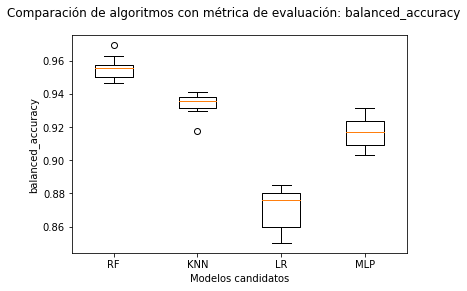

In [129]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

# Entreno con validación cruzada
for scoring in error_metrics:
    print('Métrica de evaluación: ', scoring)
    for name, model in models:
        print('Modelo ', name)
        cross_validation = StratifiedShuffleSplit(n_splits=num_folds, random_state=0)
        cv_results = cross_val_score(model, X_train, y_train, cv=cross_validation, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        resume = (name, cv_results.mean(), cv_results.std())
        msg.append(resume)
    print(msg)

    # Comparar resultados entre algoritmos
    fig = plt.figure()
    fig.suptitle('Comparación de algoritmos con métrica de evaluación: %s' %scoring)
    ax = fig.add_subplot(111)
    ax.set_xlabel('Modelos candidatos')
    ax.set_ylabel('%s' %scoring)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

    results = []


## *7. Ajustar hiperparámetros*

Pasos para realizar el hiperajuste de los parámetros:

* Métrica para optimizar: *balanced_accuracy*
* Definir los rangos de los parámetros de búsqueda: *params*
* Asignar un método de validación: *StratifiedShuffleSplit* (n_splits = 10)
* Entrenar con los datos de validación: *X_val*

In [130]:
#RandomForestClassifier
modelo = RandomForestClassifier()
params = {
     'n_estimators': [100, 600], #default=100
     'min_samples_split': [2,5], #default=2
     'max_features': ['auto','sqrt']  #default='auto'
 }
scoring='balanced_accuracy'
cross_validation = StratifiedShuffleSplit(n_splits=10, random_state=0)
my_cv = cross_validation.split(X_val, y_val)
gsearch = GridSearchCV(estimator=modelo, param_grid=params, scoring=scoring, cv=my_cv)
gsearch.fit(X_val, y_val)

print("Mejor resultado: %f utilizando los siguientes hiperparámetros %s" % (gsearch.best_score_, gsearch.best_params_))
means = gsearch.cv_results_['mean_test_score']
stds = gsearch.cv_results_['std_test_score']
params = gsearch.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

Mejor resultado: 0.944492 utilizando los siguientes hiperparámetros {'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 600}


## *8. Evaluación final del modelo*



Métricas de evaluación:
  * 1. Matriz de confusión
  * 2. Coeficiente de Matthews (MCC)
  * 3. Curva ROC / AUC

    
**Entrena el modelo con los hiperparámetros óptimos encontrados en el apartado anterior y realiza las predicciones.** 

In [137]:

modelo_final = RandomForestClassifier(max_features='auto', min_samples_split=2,  n_estimators=600)
modelo_final.fit(X_train,y_train)  # Se entrena al modelo RF
y_predict = modelo_final.predict(X_test)  # Se calculan las predicciones



**¿Qué atributos tienen más peso en el modelo?** 

Para el caso del Random Forest, el atributo más importante para predecir los precios es la generación de carbón, seguido de la generación hidráulica y del mes del año. En la matriz de correlación, el atributo carbón era el que tenía más correlación con la variable clase. 

In [138]:
# Imprimir la importancia de cada atributo
importancia_atributos = gsearch.best_estimator_.feature_importances_

std = np.std([tree.feature_importances_ for tree in gsearch.best_estimator_.estimators_],axis=0)
indices = np.argsort(importancia_atributos)[::-1]

# Print the feature ranking
print("Ranking de importancia de atributos:")
for f in range(X_scaled.shape[1]):
    print("%d. Atributo %d (%f)" % (f + 1, indices[f], importancia_atributos[indices[f]]))


Ranking de importancia de atributos:
1. Atributo 8 (0.487655)
2. Atributo 2 (0.090093)
3. Atributo 1 (0.081757)
4. Atributo 5 (0.073070)
5. Atributo 6 (0.064197)
6. Atributo 7 (0.061889)
7. Atributo 4 (0.050744)
8. Atributo 3 (0.045898)
9. Atributo 0 (0.044696)


**1. Matriz de confusión**

In [139]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_predict)
print(classification_report(y_test, y_predict))
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3303
           1       0.95      0.94      0.94      1064

    accuracy                           0.97      4367
   macro avg       0.97      0.96      0.96      4367
weighted avg       0.97      0.97      0.97      4367

[[3251   52]
 [  67  997]]


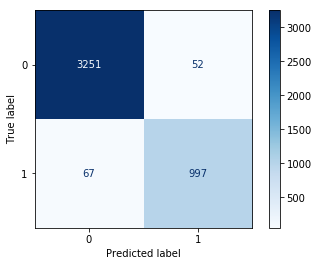

In [140]:
# Gráfico no normalizado de la martiz de confusión

disp = plot_confusion_matrix(modelo_final, X_test, y_test,
                                 cmap=plt.cm.Blues, values_format = '')

**2. Coeficiente de Matthews (MCC)**

El MCC utiliza coeficientes de correlación entre -1 y +1. 
* Coeficiente +1 representa una predicción perfecta
* Coeficiente 0 representa una predicción media aleatoria
* Coeficiente -1 representa una predicción inversa. 

In [141]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_predict)

0.92575063800918

**3. Curva ROC / AUC**

* **Curva ROC**: Curva de la tasa de verdaderos positivos frente a la tasa de falsos positivos en diferentes umbrales de clasificación.

* **AUC** (Area under the curve): El área bajo la curva (AUC) ROC es la probabilidad de que un clasificador tenga más seguridad de que un ejemplo positivo elegido al azar sea realmente positivo con respecto a que un ejemplo negativo elegido al azar sea positivo.

AUC: 0.961


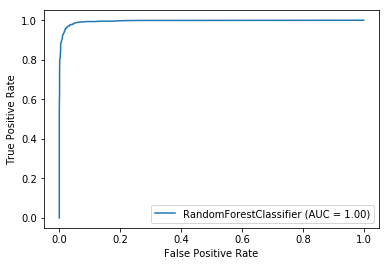

In [142]:
from sklearn.metrics import roc_auc_score, plot_roc_curve, roc_curve, auc

plot_roc_curve(modelo_final, X_test, y_test)
auc = roc_auc_score(y_test, y_predict)
print('AUC: %.3f' % auc)